In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import cvxpy as cp
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

C:\Users\Terry_Xu\AppData\Local\Temp\ipykernel_11084\1659410565.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
df_ori = pd.read_csv('./data/close.csv', sep=',')
df_ori['cash'] = 1
# df_ori = pd.read_csv('./data/close_390.csv', sep=',')
df_ori.head()

,Date,AAPL,AMZN,JNJ,JPM,LLY,MSFT,NVDA,PG,UNH,XOM,cash
0,2003-11-18,0.364464,2.4250,51.939999,34.889999,70.940002,25.150000,1.639167,47.830002,24.549999,35.150002,1
1,2003-11-19,0.364643,2.4765,52.259998,34.759998,72.540001,25.350000,1.685000,48.040001,25.790001,35.439999,1
2,2003-11-20,0.363929,2.4425,51.490002,34.630001,71.529999,25.100000,1.640000,47.705002,25.400000,35.310001,1
3,2003-11-21,0.362143,2.4290,50.880001,35.000000,69.610001,25.110001,1.646667,47.880001,25.860001,35.340000,1
4,2003-11-24,0.377679,2.5665,51.480000,35.270000,70.500000,25.730000,1.745833,48.310001,26.400000,35.560001,1


In [4]:
df_ori.set_index('Date', inplace=True)
df_ori.index = pd.DatetimeIndex(df_ori.index)
# ENDTIME = pd.to_datetime('2008-12-31')
# df_ori = df_ori.loc[df_ori.index <= ENDTIME]
df_ori.tail()

,AAPL,AMZN,JNJ,JPM,LLY,MSFT,NVDA,PG,UNH,XOM,cash
Date,,,,,,,,,,,
2023-11-13,184.800003,142.589996,147.630005,145.779999,612.710022,366.679993,486.200012,152.460007,542.570007,104.839996,1
2023-11-14,187.440002,145.800003,147.660004,148.440002,610.820007,370.269989,496.559998,152.119995,540.460022,104.290001,1
2023-11-15,188.009995,143.199997,148.800003,149.740005,588.539978,369.670013,488.880005,151.419998,538.409973,103.660004,1
2023-11-16,189.710007,142.830002,150.100006,151.449997,588.750000,376.170013,494.799988,152.830002,539.820007,102.459999,1
2023-11-17,189.690002,145.179993,149.789993,152.820007,591.710022,369.850006,492.980011,151.070007,536.289978,104.959999,1


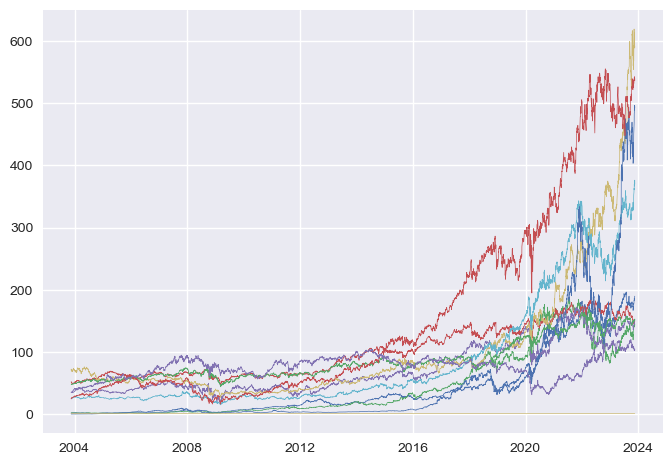

In [5]:
plt.figure()
for stk in df_ori.columns:
    plt.plot(df_ori.index, df_ori.loc[:,stk], linewidth=0.5, label=stk)
    # plt.legend(loc='best')

plt.show()

In [6]:
df = df_ori.pct_change().iloc[1:,:]
df['cash']=1.03**(1/365)-1
df.head()

,AAPL,AMZN,JNJ,JPM,LLY,MSFT,NVDA,PG,UNH,XOM,cash
Date,,,,,,,,,,,
2003-11-19,0.000491,0.021237,0.006161,-0.003726,0.022554,0.007952,0.027961,0.004391,0.050509,0.008250,0.000081
2003-11-20,-0.001958,-0.013729,-0.014734,-0.003740,-0.013923,-0.009862,-0.026706,-0.006973,-0.015122,-0.003668,0.000081
2003-11-21,-0.004908,-0.005527,-0.011847,0.010684,-0.026842,0.000398,0.004065,0.003668,0.018110,0.000850,0.000081
2003-11-24,0.042900,0.056608,0.011792,0.007714,0.012786,0.024691,0.060222,0.008981,0.020882,0.006225,0.000081
2003-11-25,-0.022223,0.022209,-0.015346,0.007372,0.002411,-0.012825,0.017184,0.002587,0.019508,0.007312,0.000081


In [7]:
df = df.dropna(axis=1)
df.isnull().sum().sum()

0

In [8]:
df.head()

,AAPL,AMZN,JNJ,JPM,LLY,MSFT,NVDA,PG,UNH,XOM,cash
Date,,,,,,,,,,,
2003-11-19,0.000491,0.021237,0.006161,-0.003726,0.022554,0.007952,0.027961,0.004391,0.050509,0.008250,0.000081
2003-11-20,-0.001958,-0.013729,-0.014734,-0.003740,-0.013923,-0.009862,-0.026706,-0.006973,-0.015122,-0.003668,0.000081
2003-11-21,-0.004908,-0.005527,-0.011847,0.010684,-0.026842,0.000398,0.004065,0.003668,0.018110,0.000850,0.000081
2003-11-24,0.042900,0.056608,0.011792,0.007714,0.012786,0.024691,0.060222,0.008981,0.020882,0.006225,0.000081
2003-11-25,-0.022223,0.022209,-0.015346,0.007372,0.002411,-0.012825,0.017184,0.002587,0.019508,0.007312,0.000081


In [9]:
def equally_weighted(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1 / len(df.columns)] * len(df.columns))
    # print(cur_stg)

    for i in range(len(df)):
        cur_pfl = cur_pfl * np.dot(cur_stg, 1 + df.iloc[i,:].values)
        arr_pfl.append(cur_pfl)

    return arr_pfl

arr_equal = equally_weighted(df)

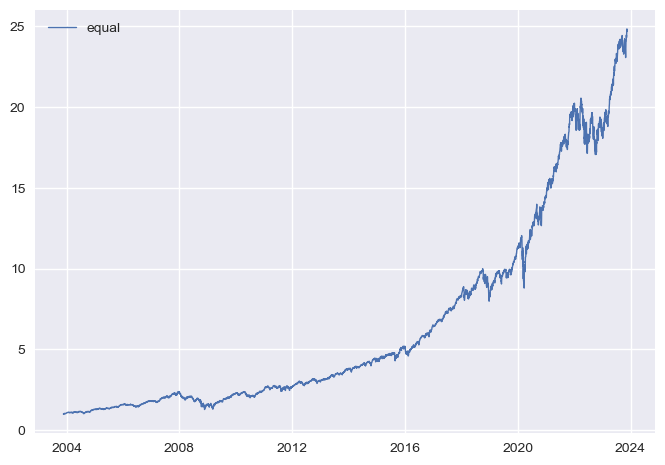

In [10]:
plt.figure()
# plt.plot(df.index, arr_pfl[:-1], linewidth=0.5, label='OGD')
plt.plot(df.index, arr_equal[:-1], linewidth=1, label='equal')
plt.legend(loc='best')
plt.show()

In [22]:
# begin OGD process
# import math

def OGD_update(x_old, ETA, loss, num_of_var):
    x = cp.Variable(num_of_var, nonneg=True)
    # x = cp.Variable(num_of_var, nonneg=False)
    objective = cp.Minimize(ETA * np.array(loss) @ x + 0.5 * cp.sum((x - x_old) ** 2))
    constraints = [cp.sum(x) == 1]
    prob = cp.Problem(objective, constraints)
    result = prob.solve()

    return x.value

def OGD_algo(df, ETA):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 1e-3
    # RSKFREE = 1.02 ** (1/365)
    ret=[1]
    weight=[sum(cur_stg)]

    for i in tqdm(range(len(df) - 1)):
        # return of today
        commision_rate = sum(abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (np.array(df.iloc[i,:].values)+1)*(1+50*np.linalg.norm(cur_stg - last_stg,ord=2))
        # direction = -1 * (np.array(df.iloc[i,:].values)+1)
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        cur_stg = OGD_update(cur_stg, ETA, direction, len(df.columns))
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight

ETA = 0.2
arr_pfl , arr_stg , ret, weight= OGD_algo(df, ETA)

100%|██████████| 5033/5033 [00:50<00:00, 99.14it/s] 


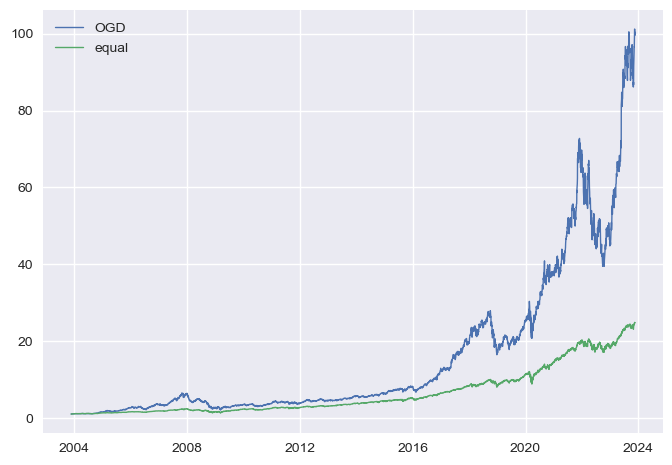

In [23]:
plt.figure()
plt.plot(df.index, arr_pfl, linewidth=1, label='OGD')
plt.plot(df.index, arr_equal[:-1], linewidth=1, label='equal')
plt.legend(loc='best')
plt.show()

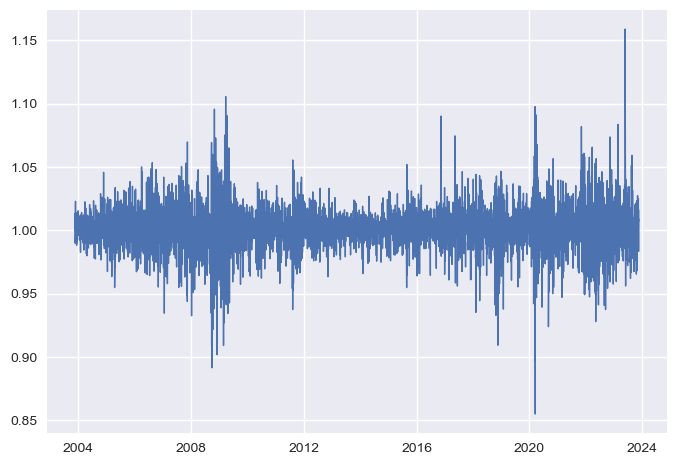

In [24]:
plt.figure()
plt.plot(df.index, ret, linewidth=1, label='OGD')
plt.show()

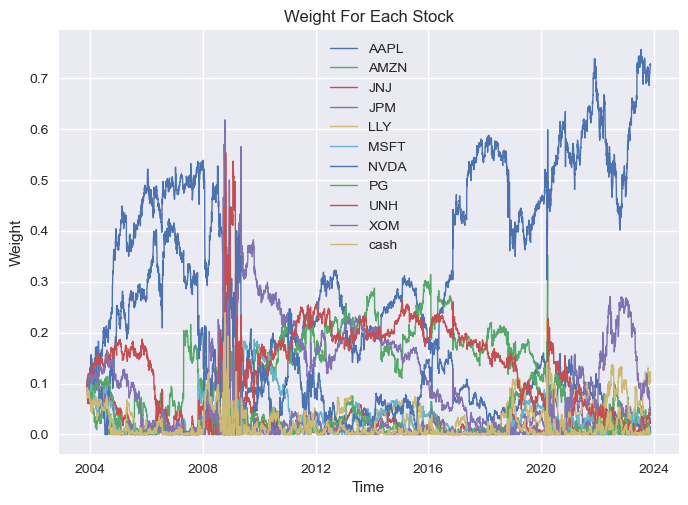

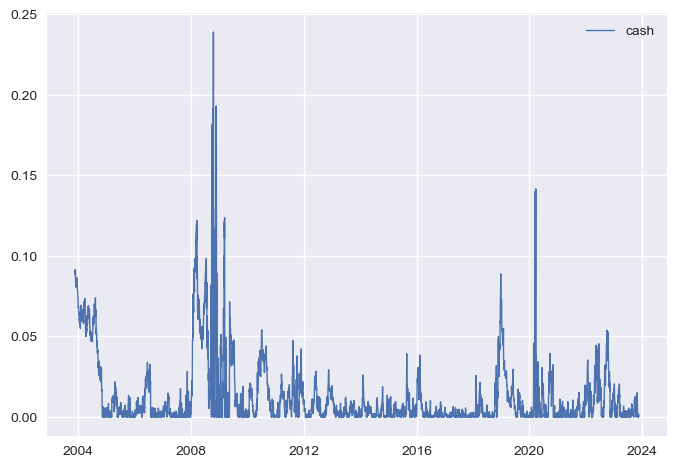

In [25]:
arr_stg = pd.DataFrame(arr_stg, columns=df.columns)

plt.figure()
for stk in arr_stg.columns:
    plt.plot(df.index, arr_stg.loc[:,stk], linewidth=1, label=stk)
    plt.legend(loc='best')

# plt.plot(df.index, arr_stg.loc[:,'cash'], linewidth=1, label=stk)
# plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Weight')
plt.title('Weight For Each Stock')
plt.show()
plt.figure()
plt.plot(df.index, arr_stg.loc[:,'cash'], linewidth=1, label=stk)
plt.legend(loc='best')
plt.show()